# Apply logistic regression to categorize whether a county had high mortality rate due to contamination

## 1. Import the necessary packages to read in the data, plot, and create a logistic regression model

In [40]:
import pandas as pd
%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression

## 2. Read in the hanford.csv file in the `data/` folder 

In [41]:
df = pd.read_csv('../data/hanford.csv')

<img src="../../images/hanford_variables.png"></img>

## 3. Calculate the basic descriptive statistics on the data

In [42]:
df.describe()

,Exposure,Mortality
count,9.000000,9.000000
mean,4.617778,157.344444
std,3.491192,34.791346
min,1.250000,113.500000
25%,2.490000,130.100000
50%,3.410000,147.100000
75%,6.410000,177.900000
max,11.640000,210.300000


In [43]:
iqr = df.quantile(q=0.75) - df.quantile(q=0.25)
iqr

Exposure      3.92
Mortality    47.80
dtype: float64

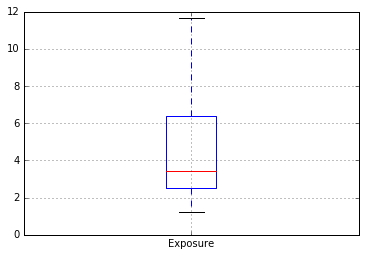

In [44]:
df.boxplot(column='Exposure', return_type='axes')

## 4. Find a reasonable threshold to say exposure is high and recode the data 

In [45]:
threshold = df['Exposure'].median()

In [46]:
df_high = df[df['Exposure'] >= threshold]
df_high.shape

(5, 3)

In [47]:
df_high

,County,Exposure,Mortality
2,Gilliam,3.41,129.9
5,HoodRiver,3.83,162.3
6,Portland,11.64,207.5
7,Columbia,6.41,177.9
8,Clatsop,8.34,210.3


## 5. Create a logistic regression model

In [61]:
#lr = LogisticRegression(df_high)
lm = LogisticRegression()

In [72]:
#X = df_high['Exposure'].values
#y = df_high['Mortality'].values

data = np.asarray(df_high[['Mortality','Exposure']])
#X = data[:,1:] # ',' = all of the rows
#y = data[:,0]

x = np.asarray(df_high[['Exposure']])
y = np.asarray(df_high['Mortality'])
#lr.fit(x, y)
x, y

(array([[  3.41],
        [  3.83],
        [ 11.64],
        [  6.41],
        [  8.34]]), array([ 129.9,  162.3,  207.5,  177.9,  210.3]))

## 6. Predict whether the mortality rate (Cancer per 100,000 man years) will be high at an exposure level of 50

In [64]:
#lr.predict(50)